<font size="+3" color=BLUE><b> <center><u> Indian Premier League (IPL) Analysis (2008-2020) </u></center></b></font>

<img src="image.jpg" width=1000 height=1000 />
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>Objective  </center></h2>

Goal of this jupyter notebook is following:

- Basic Exploratory Data Analysis.
- Feature Analysis


## Loading Dataset & Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools

sns.set_theme()
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")


In [2]:
import plotly.express as px 
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
deleveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
matches = pd.read_csv('IPL Matches 2008-2020.csv')

## Basic Exploratory Data Analysis

In [4]:
deleveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
deleveries.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [6]:
deleveries.shape

(193468, 18)

In [7]:
deleveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
deleveries.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [9]:
deleveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [10]:
matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [12]:
matches.shape

(816, 17)

In [13]:
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [14]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [14]:
matches.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [15]:
deleveries.dtypes

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket            int64
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object

In [16]:
old = ['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals']
new = ['RCB','KX1P','DC','MI','KKR','RR','SRH','CSK','KTK','PW','SRH','GL','RPS','RPS','DC']
matches.replace(old,new,inplace=True)
deleveries.replace(old,new,inplace=True)

In [17]:
matches['date'] =  pd.to_datetime(matches['date'],
                              format='%d-%m-%Y')

In [18]:
matches['city'].fillna('UAE',inplace=True)

In [19]:
matches[matches['winner'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,DC,PW,DC,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,RCB,RR,RR,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,RCB,DC,RCB,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,RCB,RR,RR,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [20]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'UAE', 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [21]:
old = ['Bangalore',  'Abu Dhabi', 'Dubai',
       'Sharjah','Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein']
new = ['Bengaluru','UAE','UAE','UAE','UAE','South Africa','South Africa','South Africa'
       ,'South Africa','South Africa','South Africa','South Africa']
print(len(old),len(new))

12 12


In [22]:
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [23]:
matches.replace(old,new,inplace=True)

In [24]:
matches['season'] = matches['date'].dt.year

In [25]:
matches['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

## Experiment and Result analysis

### Number Of Matches Played In Various Season

In [26]:
season = matches['season'].value_counts().sort_values()
season = pd.DataFrame(season)
season
season.reset_index(inplace=True)
season.rename(columns={'index':'year'},inplace=True)
season.rename(columns={'season':'count'},inplace=True)
season.style.background_gradient(cmap='PuBu')

,year,count
0,2009,57
1,2008,58
2,2015,59
3,2017,59
4,2010,60
5,2014,60
6,2016,60
7,2018,60
8,2019,60
9,2020,60


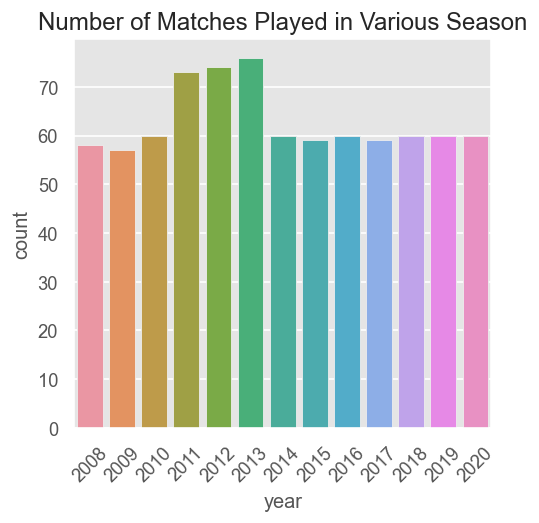

In [27]:
plt.figure(figsize=(4,4),dpi=120)
plt.title('Number of Matches Played in Various Season')
sns.barplot(x='year',y='count',data=season)
plt.xticks(rotation=45)
plt.show()

### Total Runs Scored in Various Season

In [28]:
matchIdSeason = matches[['id','season']]
total_runs_in_season = matchIdSeason.merge(deleveries[['id','total_runs']],left_on='id',right_on='id',how='left')
total_runs_in_season

,id,season,total_runs
0,335982,2008,1
1,335982,2008,1
2,335982,2008,0
3,335982,2008,1
4,335982,2008,1
...,...,...,...
193463,1237181,2020,0
193464,1237181,2020,1
193465,1237181,2020,1
193466,1237181,2020,1


In [29]:
total_runs_in_season=total_runs_in_season.groupby(['season']).sum().drop('id',axis=1).reset_index()

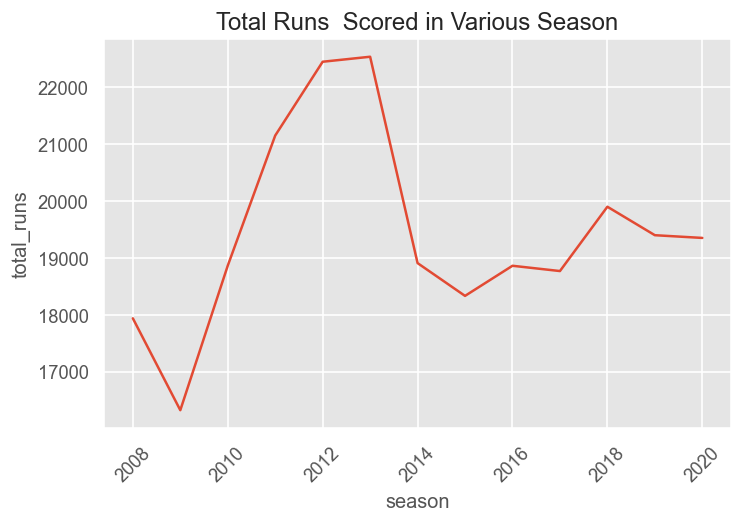

In [30]:
plt.figure(figsize=(6,4),dpi=120)
plt.title('Total Runs  Scored in Various Season')
sns.lineplot(x='season',y='total_runs',data=total_runs_in_season)
plt.xticks(rotation=45)
plt.show()

In [31]:
season=season.sort_values(by='year').reset_index()
print(season)
total_runs_in_season['total matches'] = season['count']
total_runs_in_season['runs per match'] = total_runs_in_season['total_runs'] // total_runs_in_season['total matches']

    index  year  count
0       1  2008     58
1       0  2009     57
2       4  2010     60
3      10  2011     73
4      11  2012     74
5      12  2013     76
6       5  2014     60
7       2  2015     59
8       6  2016     60
9       3  2017     59
10      7  2018     60
11      8  2019     60
12      9  2020     60


In [32]:
total_runs_in_season.style.background_gradient(cmap='PuBu')

,season,total_runs,total matches,runs per match
0,2008,17937,58,309
1,2009,16320,57,286
2,2010,18864,60,314
3,2011,21154,73,289
4,2012,22453,74,303
5,2013,22541,76,296
6,2014,18909,60,315
7,2015,18332,59,310
8,2016,18862,60,314
9,2017,18769,59,318


### Total Runs Scored Per Match in Various Season

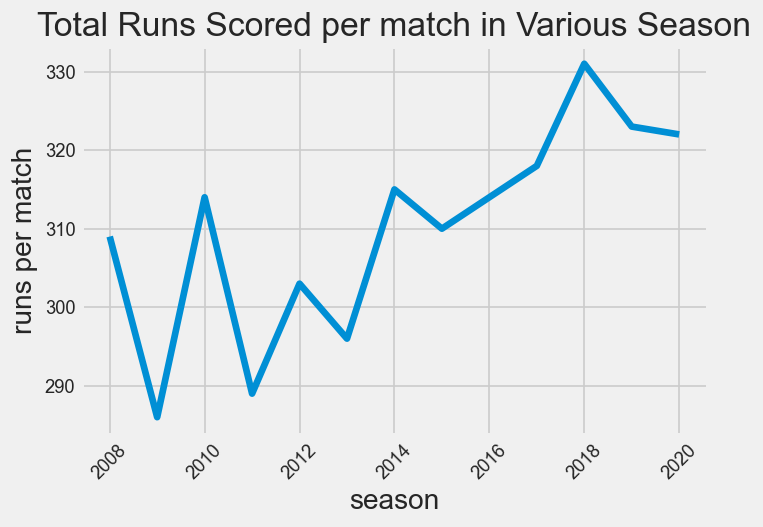

In [33]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,4),dpi=120)
plt.title('Total Runs Scored per match in Various Season')
sns.lineplot(x='season',y='runs per match',data=total_runs_in_season)
plt.xticks(rotation=45)
plt.show()

### Total Wins By Each Team from 2008-2020

In [34]:
matches['winner'].unique()

array(['KKR', 'CSK', 'DC', 'RCB', 'RR', 'KX1P', 'SRH', 'MI', 'PW', 'KTK',
       nan, 'RPS', 'GL'], dtype=object)

In [35]:
total_matches = matches['winner'].value_counts().sum()

In [36]:
total_wins = matches['winner'].value_counts()

In [37]:
total_wins.index

Index(['MI', 'CSK', 'KKR', 'SRH', 'RCB', 'KX1P', 'DC', 'RR', 'RPS', 'GL', 'PW',
       'KTK'],
      dtype='object')

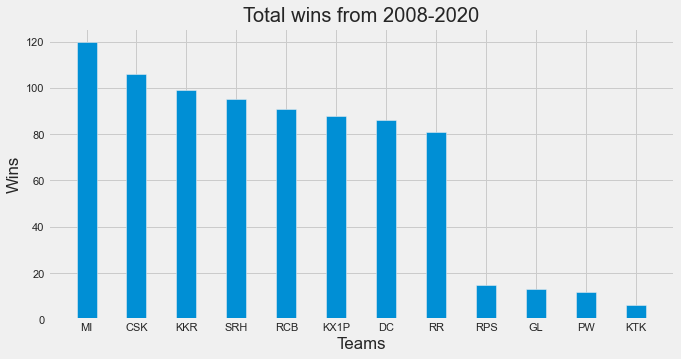

In [38]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(total_wins.index, total_wins.values,
        width = 0.4)
 
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.title("Total wins from 2008-2020")
plt.show()

### Total Toss Win By Each Team 

In [39]:
matches['toss_winner'].value_counts()

MI      106
SRH     100
DC      100
KKR      98
CSK      97
RCB      87
RR       87
KX1P     85
PW       20
GL       15
RPS      13
KTK       8
Name: toss_winner, dtype: int64

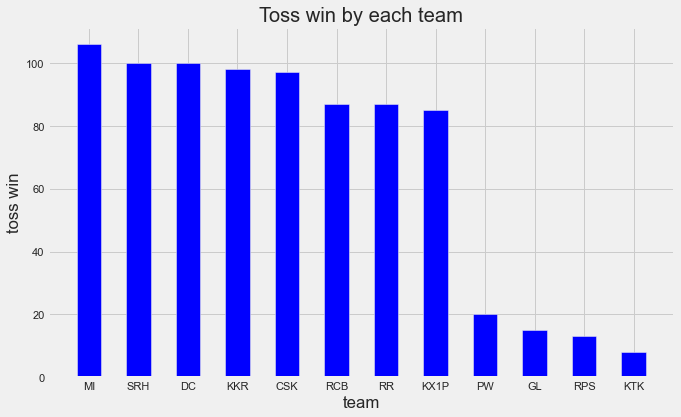

In [40]:
toss = matches['toss_winner'].value_counts()

plt.figure(figsize=(10,6))
plt.title('Toss win by each team')
plt.bar(toss.index, toss.values,width=0.5,color='#0000FF')
plt.ylabel('toss win')
plt.xlabel('team')
plt.show()

### Toss Decision Percentage Bat/Field

In [41]:
toss_decision = matches['toss_decision']
toss_decision=toss_decision.value_counts(normalize = True)
toss_win_match_win=matches[matches['toss_winner']==matches['winner']]
toss_win_match_loose = matches[matches['toss_winner']!=matches['winner']]
toss_decision = pd.DataFrame(toss_decision)
toss_decision

,toss_decision
field,0.607843
bat,0.392157


In [42]:
toss_decision = matches.toss_decision.value_counts(normalize=True)
labels = (np.array(toss_decision.index))
values = (np.array(toss_decision.values))
labels
values

array([0.60784314, 0.39215686])

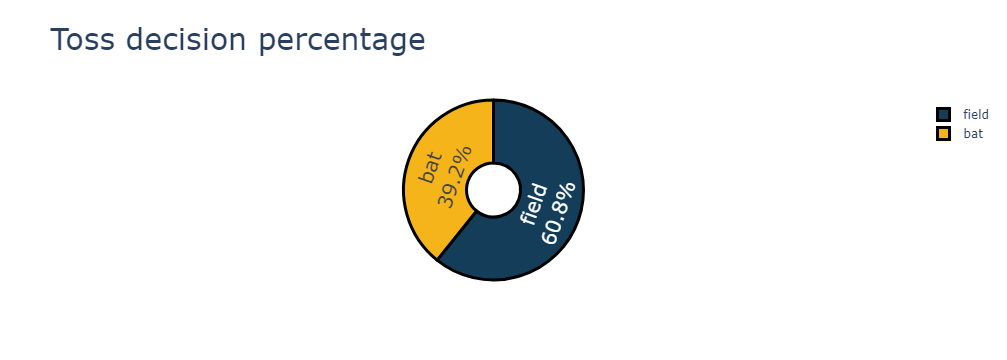

In [43]:
colors = ['#143d59', '#f4b41a']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Toss decision percentage",
                  titlefont={'size': 30},
                  )
fig.show()

### Match Win/Loose after Toss Winning

In [44]:
toss_win_match_win=matches[matches['toss_winner']==matches['winner']]
toss_win_match_loose = matches[matches['toss_winner']!=matches['winner']]
win = len(toss_win_match_win) 
loose = len(toss_win_match_loose)

In [45]:
labels = ['win','loose']
total = win + loose 
values = [win/total , loose/total]


In [46]:
color = ['#390879','b8df10']
fig =  go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.2)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=color, line=dict(color='#000000', width=2)))
fig.update_layout(title="Match Win/Loose after Toss Winning",
                  titlefont={'size': 30},
                  )
fig.show()

### Bat First / Ball First winning chances

In [47]:
matches.result.unique()

array(['runs', 'wickets', 'tie', nan], dtype=object)

In [48]:
chase = matches.result.value_counts(normalize=True)
labels = (np.array(chase.index))
values = (np.array(chase.values))
color = ['#e54b22','#abd1ff']
fig =  go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.2)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=color, line=dict(color='#000000', width=2)))
fig.update_layout(title="Bat First /  Ball First",
                  titlefont={'size': 30},
                  )
fig.show()

### Most number of Matches Played 

In [49]:
team1 = matches['team1'].value_counts().sort_index()
team2 = matches['team2'].value_counts().sort_index()
print(team1,team2)
total_matches = team1.values + team2.values
teams = team1.index
colors = ['turquoise',] * 15
colors[6] = 'crimson'
fig=px.bar(x=teams,y=total_matches,labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Total number of matches played",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

CSK      94
DC      102
GL       16
KKR      95
KTK       7
KX1P     92
MI       97
PW       23
RCB     108
RPS      14
RR       70
SRH      98
Name: team1, dtype: int64 CSK      84
DC       92
GL       14
KKR      97
KTK       7
KX1P     98
MI      106
PW       23
RCB      87
RPS      16
RR       91
SRH     101
Name: team2, dtype: int64


### IPL different Season Winners

In [50]:
season = matches['season'].unique()
def winnerOfIPL(year):
    winner = []
    for i in year:
       winner.append(matches[matches['season']==i][-1:]['winner'].values[0])
    return winner
winner = winnerOfIPL(season)

In [51]:
winners = pd.DataFrame({'season':season  , 'winner':winner})
winners.style.background_gradient(cmap='PuBu')

,season,winner
0,2008,RR
1,2009,SRH
2,2010,CSK
3,2011,CSK
4,2012,KKR
5,2013,MI
6,2014,KKR
7,2015,MI
8,2016,SRH
9,2017,MI


### Most Wins In IPL 

In [ ]:
winning_teams = winners['winner'].value_counts()
winning_teams

MI     5
CSK    3
SRH    2
KKR    2
RR     1
Name: winner, dtype: int64

In [53]:
colors = ['#283350',] * 5
colors[0] = '#f93800'
fig=px.bar(x=winning_teams.index,y=winning_teams.values,labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Winning Teams in the IPL",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

### Wins Percentage of different Teams in IPL

In [54]:
wins = matches['winner'].value_counts().sort_index()
win_per = wins.values /(team1.values+team2.values)*100
win_per
wins.values

array([106,  86,  13,  99,   6,  88, 120,  12,  91,  15,  81,  95],
      dtype=int64)

In [55]:
#win percentage by team
colors = ['#283350',] * 13
colors[0] = '#f93800'
fig=px.bar(x=team1.index,y=win_per,labels=dict(x="Team Name",y="Count"),)
fig.update_layout(title="Win  Percentage of Teams in the IPL",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [56]:
matches['city'].unique()

array(['Bengaluru', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'UAE', 'South Africa', 'Ahmedabad',
       'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Indore',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Rajkot', 'Kanpur'],
      dtype=object)

In [57]:
matches['venue'].unique()

array(['M. Chinnaswamy Stadium', 'Punjab Cricket Association Stadium',
       'Feroz Shah Kotla', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium',
       'M.A. Chidambaram Stadium', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra 

In [58]:
matches['city'].fillna('UAE',inplace=True)

In [59]:
old = ['Bangalore',  'Abu Dhabi', 'Dubai',
       'Sharjah','Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein']
new = ['Bengaluru','UAE','UAE','UAE','UAE','South Africa','South Africa','South Africa','South Africa','South Africa','South Africa','South Africa']
print(len(old),len(new))

12 12


In [60]:
matches.replace(old,new,inplace=True)

In [61]:
matches['city'].unique()

array(['Bengaluru', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'UAE', 'South Africa', 'Ahmedabad',
       'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Indore',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Rajkot', 'Kanpur'],
      dtype=object)

In [57]:
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [62]:
matches.venue.unique()

array(['M. Chinnaswamy Stadium', 'Punjab Cricket Association Stadium',
       'Feroz Shah Kotla', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium', 'Rajiv Gandhi International Stadium',
       'M.A. Chidambaram Stadium', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra 

### Man of the match awards

In [63]:
man_of_the_match=matches['player_of_match'].value_counts()
man_of_the_match=man_of_the_match.head(10)
man_of_the_match

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
G Gambhir         13
V Kohli           13
Name: player_of_match, dtype: int64

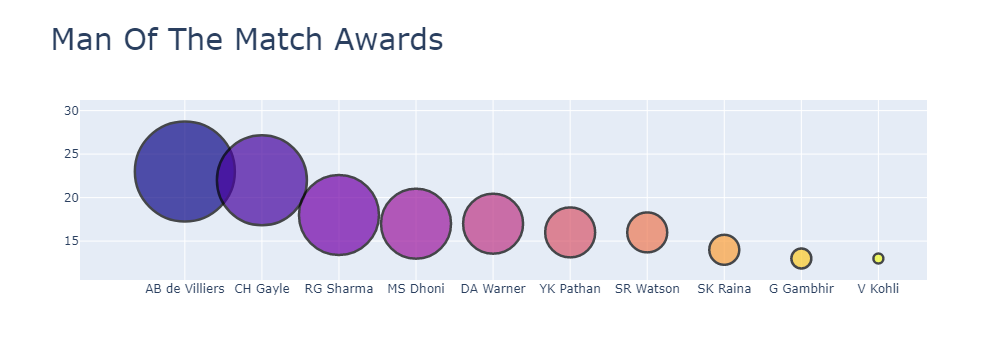

In [60]:
colors=[0, 1, 2, 3 ,4,5,6,7,8,9]
fig = go.Figure(data=go.Scatter(
    x=man_of_the_match.index,
    y=man_of_the_match.values,
    mode='markers',
    marker=dict(size=[100,90,80,70,60,50,40,30,20,10],
                color=[0, 1, 2, 3 ,4,5,6,7,8,9])
))
fig.update_layout(title="Man Of The Match Awards",
                  titlefont={'size': 30},
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

### Matches Played at Different Venues

In [64]:
location = matches['venue'].value_counts()
location

Eden Gardens                                           77
Feroz Shah Kotla                                       74
Wankhede Stadium                                       73
M. Chinnaswamy Stadium                                 65
Rajiv Gandhi International Stadium                     64
M.A. Chidambaram Stadium                               57
Punjab Cricket Association Stadium                     56
Sawai Mansingh Stadium                                 47
Dubai International Cricket Stadium                    33
Sheikh Zayed Stadium                                   29
Maharashtra Cricket Association Stadium                21
Sharjah Cricket Stadium                                18
Subrata Roy Sahara Stadium                             17
Dr DY Patil Sports Academy                             17
M.Chinnaswamy Stadium                                  15
Kingsmead                                              15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    13
SuperSport Par

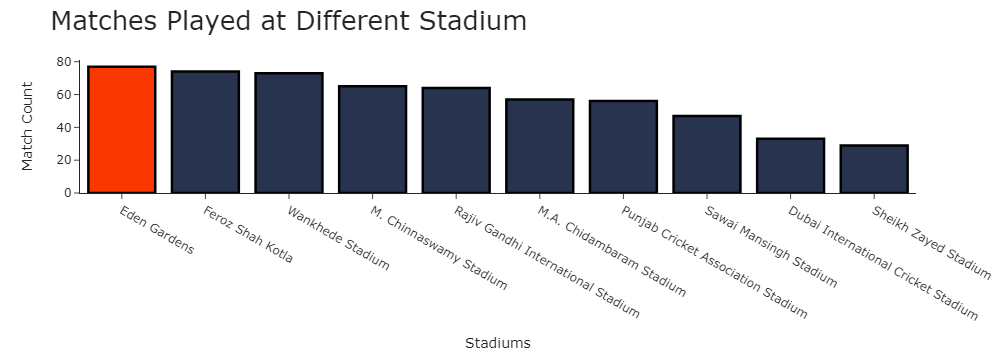

In [ ]:
location = location.head(10)
colors = ['#283350',] * 10
colors[0] = '#f93800'
fig=px.bar(x=location.index,y=location.values,labels=dict(x="Stadiums",y="Match Count"),)
fig.update_layout(title="Matches Played at Different Stadium",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

### Mumbai Indians Wins at Different Stadiums

In [66]:
mimatches = matches[matches['winner']=='MI']
cskmatches = matches[matches['winner']=='CSK']
rcbmatches = matches[matches['winner']=='RCB']

In [67]:
mi_matches = mimatches[(mimatches['team1']=='MI')|(mimatches['team2']=='MI')]['venue']
mi_matches=mi_matches.value_counts(normalize=True).head(10)
mi_matches

Wankhede Stadium                      0.350000
Eden Gardens                          0.083333
M. Chinnaswamy Stadium                0.066667
Rajiv Gandhi International Stadium    0.058333
Sheikh Zayed Stadium                  0.050000
Brabourne Stadium                     0.050000
Dr DY Patil Sports Academy            0.041667
M.A. Chidambaram Stadium              0.041667
Feroz Shah Kotla                      0.033333
Punjab Cricket Association Stadium    0.033333
Name: venue, dtype: float64

In [69]:
labels = (np.array(mi_matches.index))
values = (np.array(mi_matches.values))
plt.figure(figsize=(4,4),dpi=120)
fig =  go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.1)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=10,
                  marker=dict( line=dict(color='#000000', width=1)))

fig.update_layout(title="Mumbai Indian Matches",
                  titlefont={'size': 20},
    margin=dict(l=30, r=30, t=30, b=30),
)
fig.show()

<Figure size 480x480 with 0 Axes>

### Chennai Super Kings Wins at Different Stadiums 

In [70]:
csk_matches = cskmatches[(cskmatches['team1']=='CSK')|(cskmatches['team2']=='CSK')]['venue']
csk_matches=csk_matches.value_counts(normalize=True).head(10)
csk_matches

M.A. Chidambaram Stadium                   0.377358
Wankhede Stadium                           0.066038
Feroz Shah Kotla                           0.056604
Dubai International Cricket Stadium        0.056604
Eden Gardens                               0.047170
Maharashtra Cricket Association Stadium    0.047170
M. Chinnaswamy Stadium                     0.037736
Dr DY Patil Sports Academy                 0.028302
Sheikh Zayed Stadium                       0.028302
Punjab Cricket Association Stadium         0.028302
Name: venue, dtype: float64

In [71]:
labels = (np.array(csk_matches.index))
values = (np.array(csk_matches.values))
plt.figure(figsize=(4,4),dpi=120)
fig =  go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.1)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=10,
                  marker=dict( line=dict(color='#000000', width=1)))

fig.update_layout(title="Chennai Super Kings  Matches",
                  titlefont={'size': 20},
    margin=dict(l=30, r=30, t=30, b=30),
)
fig.show()

<Figure size 480x480 with 0 Axes>

### Royal Chalangers Banglore Wins at Different Stadiums

In [72]:
rcb_matches = rcbmatches[(rcbmatches['team1']=='RCB')|(cskmatches['team2']=='RCB')]['venue']
rcb_matches=rcb_matches.value_counts(normalize=True).head(10)
rcb_matches

M. Chinnaswamy Stadium                     0.528302
M.Chinnaswamy Stadium                      0.150943
Dubai International Cricket Stadium        0.075472
Kingsmead                                  0.056604
New Wanderers Stadium                      0.056604
SuperSport Park                            0.037736
Sharjah Cricket Stadium                    0.018868
M.A. Chidambaram Stadium                   0.018868
Newlands                                   0.018868
Maharashtra Cricket Association Stadium    0.018868
Name: venue, dtype: float64

In [74]:
labels = (np.array(rcb_matches.index))
values = (np.array(rcb_matches.values))
plt.figure(figsize=(4,4),dpi=120)
fig =  go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.1)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=10,
                  marker=dict( line=dict(color='#000000', width=1)))

fig.update_layout(title="Royal Chalangers Banglore Matches",
                  titlefont={'size': 20},
    margin=dict(l=30, r=30, t=30, b=30),
)
fig.show()

<Figure size 480x480 with 0 Axes>

### Highest Runs Scored by Players in IPL (2008-2020)

In [75]:
runs = deleveries[['batsman','batsman_runs']]

In [76]:
runs_by_players = runs.groupby('batsman').sum().sort_values(by='batsman_runs',ascending=False)
runs_by_players = runs_by_players.head(10)
top_players = (runs_by_players.index)
runs = (runs_by_players.values)

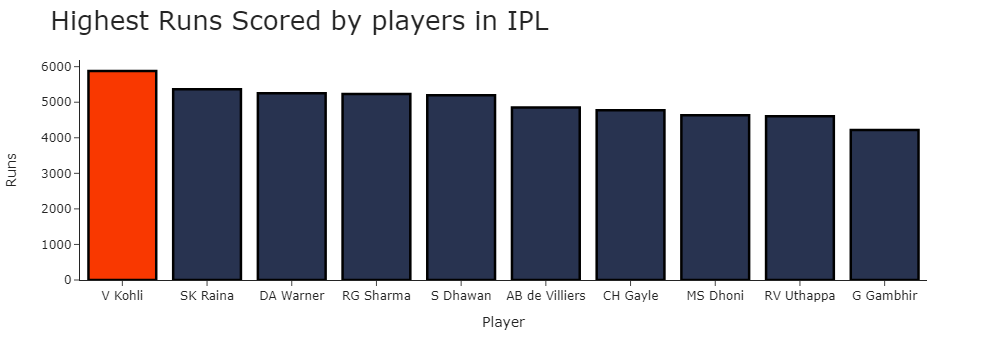

In [ ]:
colors = ['#283350',] * 10
colors[0] = '#f93800'
fig=px.bar(x=runs_by_players['batsman_runs'].index,y=runs_by_players['batsman_runs'].values,labels=dict(x="Player",y="Runs"),)
fig.update_layout(title="Highest Runs Scored by players in IPL",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

### Players With Highest Strike Rate

In [78]:
runs = deleveries[['batsman','batsman_runs']]

In [79]:
group_runs = runs.groupby('batsman').sum()
group_balls = runs.groupby('batsman').count()
group_runs['balls'] = group_balls['batsman_runs']

In [80]:
group_runs['Strike Rate'] = (group_runs['batsman_runs'] / group_runs['balls'])*100
group_runs=group_runs[group_runs['batsman_runs']>800].sort_values(by='Strike Rate',ascending=False).head(10)

In [81]:

import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(
    x=group_runs.index,
    y=group_runs['Strike Rate'],
    mode='markers',
    marker=dict(size=[100,95,90,85,80,75,70,65,60,55,50],
                color=[0,1,2,3,4,5,6,7,8,9])
))
fig.update_layout(title="Strike Rate",
                  xaxis_title="Player",
                  yaxis_title='Strike Rate',
                  titlefont={'size': 30},
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1)
fig.show()


### Top 20  Batsman Performances in IPL

In [82]:
match_runs = deleveries[['id','batsman','batsman_runs']]

In [83]:
player = match_runs.groupby(['batsman','id']).agg({'max','mean','count','sum'})
player.columns

MultiIndex([('batsman_runs',  'mean'),
            ('batsman_runs',   'max'),
            ('batsman_runs',   'sum'),
            ('batsman_runs', 'count')],
           )

In [85]:
player.reset_index(inplace=True)
player

batsman       id batsman_runs              
                                       mean max sum count
0      A Ashish Reddy   548346     1.000000   6  10    10
1      A Ashish Reddy   548352     1.000000   2   3     3
2      A Ashish Reddy   548359     1.000000   4   8     8
3      A Ashish Reddy   548373     2.500000   4  10     4
4      A Ashish Reddy   548376     0.800000   2   4     5
...               ...      ...          ...  ..  ..   ...
12157          Z Khan   980903     0.444444   4   4     9
12158          Z Khan   980993     0.500000   1   2     4
12159          Z Khan  1082595     1.000000   1   1     1
12160          Z Khan  1082635     0.181818   1   2    11
12161          Z Khan  1082646     1.000000   1   1     1

[12162 rows x 6 columns]

In [90]:
player.columns = ['batsman','id','mean score','max runs','total runs','balls played']

In [91]:
player.head()

,batsman,id,mean score,max runs,total runs,balls played
0,A Ashish Reddy,548346,1.0,6,10,10
1,A Ashish Reddy,548352,1.0,2,3,3
2,A Ashish Reddy,548359,1.0,4,8,8
3,A Ashish Reddy,548373,2.5,4,10,4
4,A Ashish Reddy,548376,0.8,2,4,5


In [94]:
player.drop(['id','mean score','max runs'],inplace=True,axis=1)

In [95]:
player['strike rate'] = player['total runs'] / player['balls played'] * 100
top_20_best_performance = player.sort_values(by=['total runs'],ascending=False).head(20)
top_20_best_performance

,batsman,total runs,balls played,strike rate
1884,CH Gayle,175,69,253.623188
1479,BB McCullum,158,77,205.194805
340,AB de Villiers,133,61,218.032787
5203,KL Rahul,132,70,188.571429
355,AB de Villiers,129,53,243.396226
1876,CH Gayle,128,62,206.451613
8748,RR Pant,128,64,200.000000
5767,M Vijay,127,57,222.807018
2359,DA Warner,126,60,210.000000
11502,V Sehwag,122,62,196.774194


In [96]:

fig = px.scatter(top_20_best_performance, x="batsman", y="total runs",
                 size='strike rate', hover_data=['strike rate'])
fig.update_layout(title="Top 20 Best Performance in IPL by Bastmen",
                  titlefont={'size': 30},
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

### Top 20 Players With Highest Averages in IPL

In [97]:

average = player[['batsman','total runs']].groupby('batsman').agg(['mean'])

In [98]:
average.columns = ['average runs']

In [99]:
top_20_average=average.sort_values(by='average runs',ascending=False).head(20)
top_20_average.reset_index(inplace=True)
top_20_average

,batsman,average runs
0,JM Bairstow,37.619048
1,LMP Simmons,37.206897
2,DA Warner,37.000000
3,KL Rahul,36.763889
4,CH Gayle,36.427481
5,HM Amla,36.062500
6,SE Marsh,35.898551
7,ML Hayden,34.593750
8,MEK Hussey,34.086207
9,RD Gaikwad,34.000000


In [100]:
fig = px.scatter(top_20_average, x="batsman", y="average runs",size='average runs',
                  hover_data=['average runs'])
fig.update_layout(title="Top 20 Players with Highest Averages in IPL",
                  titlefont={'size': 30},
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

### Most Number of Fours / Sixes / Running Bw Wickets

In [101]:
player = deleveries[['batsman','batsman_runs']]

In [102]:
four = player[player['batsman_runs']==4]
six = player[player['batsman_runs']==6]
running = player[player['batsman_runs']<4]

In [103]:
most_four = four.groupby(['batsman']).count().sort_values(by='batsman_runs',ascending=False).head(10).reset_index()
most_six = six.groupby(['batsman']).count().sort_values(by='batsman_runs',ascending=False).head(10).reset_index()
most_running = running.groupby(['batsman']).sum().sort_values(by='batsman_runs',ascending=False).head(10).reset_index()

In [104]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("Most fours hit", "Most sixes hit","Running b/w wickets"))
def size(num):
    s = [i*10 for i in range(num,0,-1)]
    return s 
fig.append_trace(go.Scatter(
    x=most_four['batsman'],
    y=most_four['batsman_runs'],
    mode='markers',
    name = 'Fours',
    marker=dict(size=[100,90,80,70,60,50,40,30,20,10],color = '#bd207b')
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=most_six['batsman'],
    y=most_six['batsman_runs'],
    mode='markers',
    name = 'Sixes',
    marker=dict(size=[100,90,80,70,60,50,40,30,20,10],color = '#1c5ead')
), row=2, col=1)
fig.append_trace(go.Scatter(
    x=most_running['batsman'],
    y=most_running['batsman_runs'],
    mode='markers',
    name = 'Running',
    marker=dict(size=[100,95,90,85,80,75,70,65,60,55],color = '#f79902')
), row=3, col=1)


fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Runs", row=3, col=1)

fig.update_layout(height=800, width=900,
                  title_text="Runs Distribution")
iplot(fig)

### Bowling Stats - Most Number Of Balls / Most Number of Wickets / Most number of Dot Balls

In [105]:
bowlers = deleveries[['bowler','is_wicket']]

In [106]:
bowler_stats=bowlers.groupby(['bowler']).sum().sort_values(by='is_wicket',ascending=False).reset_index().head(20)

In [107]:
bowler_stats

,bowler,is_wicket
0,SL Malinga,188
1,DJ Bravo,175
2,A Mishra,169
3,PP Chawla,164
4,Harbhajan Singh,161
5,R Ashwin,153
6,B Kumar,146
7,SP Narine,143
8,UT Yadav,137
9,R Vinay Kumar,127


In [108]:
most_bowling=bowlers.groupby(['bowler']).count().sort_values(by='is_wicket',ascending=False).reset_index().head(20)
most_bowling

,bowler,is_wicket
0,Harbhajan Singh,3451
1,R Ashwin,3327
2,PP Chawla,3285
3,A Mishra,3233
4,SL Malinga,2974
5,DJ Bravo,2846
6,SP Narine,2824
7,B Kumar,2795
8,RA Jadeja,2759
9,UT Yadav,2642


In [109]:
balls = deleveries[['bowler','total_runs']]
dot_balls = balls[balls['total_runs']==0]
dot_balls

,bowler,total_runs
2,Z Khan,0
8,JH Kallis,0
9,JH Kallis,0
10,JH Kallis,0
17,SB Joshi,0
...,...,...
193431,KH Pandya,0
193449,JJ Bumrah,0
193455,KA Pollard,0
193456,KA Pollard,0


In [110]:
top_bowlers = dot_balls.groupby('bowler').count().sort_values(by='total_runs',ascending=False).reset_index().head(20)
top_bowlers

,bowler,total_runs
0,Harbhajan Singh,1244
1,R Ashwin,1166
2,B Kumar,1155
3,SL Malinga,1144
4,PP Chawla,1137
5,A Mishra,1125
6,SP Narine,1100
7,P Kumar,1075
8,DW Steyn,1019
9,UT Yadav,954


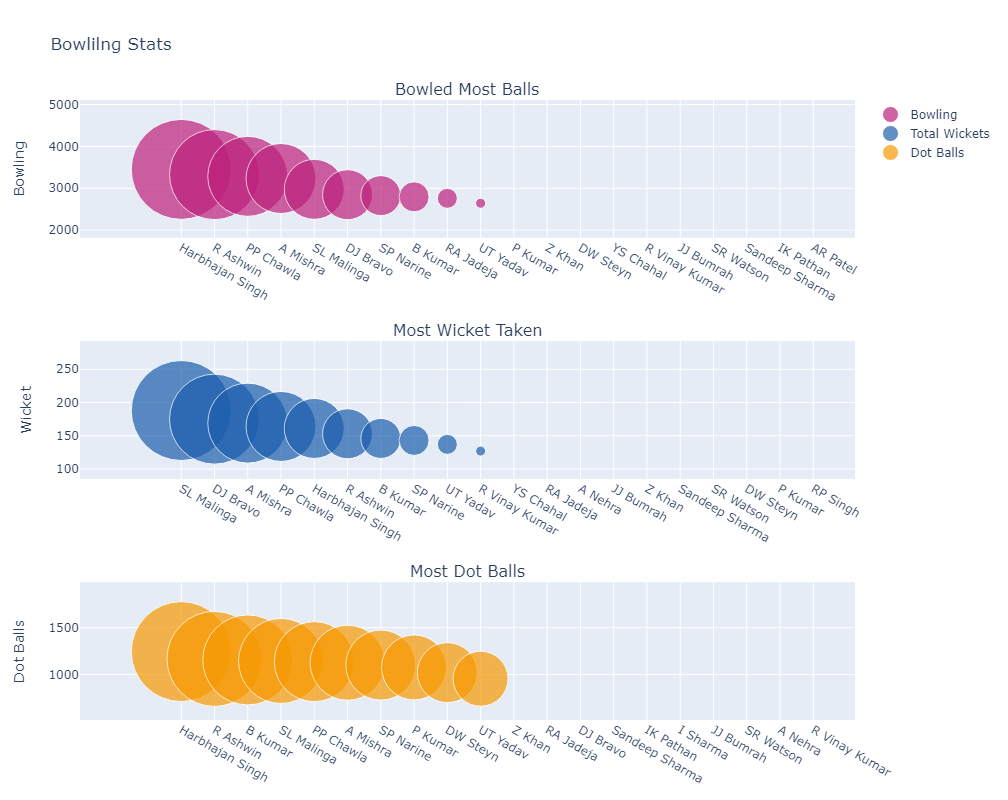

In [ ]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("Bowled Most Balls", "Most Wicket Taken","Most Dot Balls"))

fig.append_trace(go.Scatter(
    x=most_bowling['bowler'],
    y=most_bowling['is_wicket'],
    mode='markers',
    name = 'Bowling',
    marker=dict(size=[100,90,80,70,60,50,40,30,20,10],color = '#bd207b')
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=bowler_stats['bowler'],
    y=bowler_stats['is_wicket'],
    mode='markers',
    name = 'Total Wickets',
    marker=dict(size=[100,90,80,70,60,50,40,30,20,10],color = '#1c5ead')
), row=2, col=1)
fig.append_trace(go.Scatter(
    x=top_bowlers['bowler'],
    y=top_bowlers['total_runs'],
    mode='markers',
    name = 'Dot Balls',
    marker=dict(size=[100,95,90,85,80,75,70,65,60,55],color = '#f79902')
), row=3, col=1)


fig.update_yaxes(title_text="Bowling", row=1, col=1)
fig.update_yaxes(title_text="Wicket", row=2, col=1)
fig.update_yaxes(title_text="Dot Balls", row=3, col=1)

fig.update_layout(height=800, width=800,
                  title_text="Bowlilng Stats")
iplot(fig)

### Best Fielders in IPL

In [112]:
fielding =deleveries[~deleveries['fielder'].isnull()]

In [113]:
top_fielding=fielding['fielder'].value_counts()

In [114]:
top_fielding

MS Dhoni                      164
KD Karthik                    156
RV Uthappa                    123
AB de Villiers                117
SK Raina                      105
                             ... 
SK Warne,MM Patel               1
MD Mishra                       1
R Sathish (sub),RV Uthappa      1
RP Singh,Harmeet Singh          1
RA Jadeja (sub)                 1
Name: fielder, Length: 879, dtype: int64

In [115]:
colors = ['#283350',] * 10
colors[0] = '#f93800'
fig=px.bar(x=top_fielding.head(10).index,y=top_fielding.head(10).values,labels=dict(x="Players",y="Total Dismissal"),)
fig.update_layout(title="Top fielders in IPL ",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

### Fielding Statistics

In [116]:
wicket_keeper = fielding[fielding['dismissal_kind']=='stumped']
top_wk=wicket_keeper['fielder'].value_counts().head(10)

most_catches = fielding[fielding['dismissal_kind']=='caught']
top_catcher=most_catches['fielder'].value_counts().head(10)

most_run_out = fielding[fielding['dismissal_kind']=='run out']
top_run_out=most_run_out['fielder'].value_counts().head(10)

In [117]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("Most Stumping", "Most Catches","Most Run Outs"))

fig.append_trace(go.Scatter(
    x=top_wk.index,
    y=top_wk.values,
    mode='markers',
    name = 'stumpings',
    marker=dict(size=[100,90,80,70,60,50,40,30,20,10],color = '#bd207b')
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=top_catcher.index,
    y=top_catcher.values,
    mode='markers',
    name = 'catches',
    marker=dict(size=[100,90,80,70,60,50,40,30,20,10],color = '#1c5ead')
), row=2, col=1)
fig.append_trace(go.Scatter(
    x=top_run_out.index,
    y=top_run_out.values,
    mode='markers',
    name = 'run outs',
    marker=dict(size=[100,90,80,70,60,50,40,30,20,10],color = '#f79902')
), row=3, col=1)


fig.update_yaxes(title_text="count", row=1, col=1)
fig.update_yaxes(title_text="count", row=2, col=1)
fig.update_yaxes(title_text="count", row=3, col=1)

fig.update_layout(height=800, width=800,
                  title_text="Fielding Stats")
iplot(fig)

### Most Famous Umpires

In [118]:
df = pd.read_csv("IPL Matches 2008-2020.csv")
umpires = pd.concat([df['umpire1'],df['umpire2']])
umpires.shape

(1632,)

In [119]:
umpires = umpires.value_counts()

In [120]:
umpires = pd.DataFrame({
'umpire':umpires.index ,
    'count':umpires.values
}
)

In [121]:
umpires.head(8).style.background_gradient(cmap='PuBu')

,umpire,count
0,S Ravi,121
1,HDPK Dharmasena,94
2,AK Chaudhary,87
3,C Shamshuddin,82
4,M Erasmus,65
5,CK Nandan,57
6,Nitin Menon,57
7,SJA Taufel,55
